___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# SEGUNDO EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre:

## Fecha: 19 de Octubre del 2018

## Por: Carlos Alejandro Gutiérrez Sandoval

In [1]:
'''Paquetería'''
from scipy import stats as s
import numpy as n
from matplotlib import pyplot as plt

# 1.
La financiera ”El cerdito feliz” atiende la apertura de cuentas de ahorro en su sucursal matriz, en esta sucursal se tienen 4 ejecutivos para atención al inversionista, teniendo una media de tiempo para la atención de un cliente de 30 minutos, aunque con frecuencia se requiere que uno de los ejecutivos participe en juntas de evaluación de crédito, lo que provoca que el equipo de atención disminuya a 3 ejecutivos y en estas circunstancias el promedio de atención por cliente aumenta a 45 minutos. El tiempo entre la llegada de cada cliente en promedio es de 25 minutos, si la apertura de la sucursal es a las 9:00 a.m. y cierra su atención al público a las 14:00 horas, realiza una simulación de mímino 1000 escenarios y responda.

In [2]:
tiempo_expon = lambda media: s.expon.rvs(scale=media)

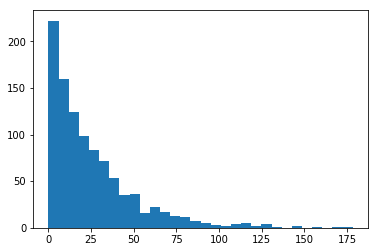

E[x] 25.453491099242143


In [3]:
''' Confirmamos que visualmente la distribución generada es exponencial'''
test =[tiempo_expon(25) for i in range(1000)]
plt.hist(test,bins =30)
plt.show()
print('E[x]',n.mean(test))

<div style="text-align:justify">
a) Justifique que tipo de distribuciones de probabilidad va a utilizar para realizar montecarlo.
    
La distribucion de elección es una exponencial. La exponencial es un caso particular de una distribución gamma. Esta distibución modela el tiempo transcurrido entre dos eventos. Para el caso de atención a clientes, podríamos describir al intervalo entre inicio de atención al cliente y su fin como un intervalo de tiempo que sigue una distribución exponencial. Es decir el tiempo que toma entre la atención de cada cliente es siempre mayor a 0, se acerca mucho a su media y va disminuyendo de manera geométrica, la probabilidad de que el tiempo de atención se alargue; de igual manera se aplica al intervalo de tiempo entre el arrivo de dos clientes a la sucursal. Como contra parte la probabilidad que sucedan x cantidad de eventos en una determinada unidad de tiempo sigue una distribución de poisson. Vemos que el periodo de tiempo de la financiera son 5 horas. El número de cliente que llegarán en esas 5 horas sigue una distribución de poisson. La financiera debe atender la mayor cantidad de esos clientes como le sea posible. 
    </div>

b). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 3 ejecutivos?, ¿cuántos quedarán en cola?

Definamos un ambiente local para eficientar el acceso del kernel a las variables y no confundir variables. Creamos clases para la simulación.

Supuesto:
 - El que está siendo atendido a las 14:00 se termina de atender.
 - En la hora de apertura no hay clientes esperando.

In [4]:
class simulacion:
    '''Constructor para iniciar nuestro objeto simulador,
    iniciamos las variables que no cambian en todo el proceso de simulación como el tiempo toal,
    los generadores de clientes y de atención.
    '''
    def __init__(self,tiempo:'minutos',atencion:'generador',llegada:'generador'):
        self.time = tiempo
        self.A = atencion
        self.LL = llegada        
            
    '''Generador de número de clientes y cuánto tarda en llegar el primero'''
    
    '''Genera el número de clientes de la jornada y calcula cuanto tiempo tardas en aten'''   

    '''En este método se ejecuta el proceso de simulación.El proceso a seguir es el siguiente:
        Se tiene en una cola los clientes predispuestos a llegar dentro del tiempo de simulación.
        En cada instante se procesa un cliente y se calcula el tiempo trasncurrido.
        Se procesan clientes hasta agotar el tiempo.
        El cáculo del tiempo transcurrido depende del estado de la simulación.
        En términos generales al llegar un cliente se calcula si se alcanza a
        atender antes de que llegue otro cliente, si se alcanza a atender,
        el tiempo transcurrido aumenta lo que tarde en llegar el otro cliente.
        De lo contrario el tiempo aumenta lo que tarde este en ser atendido;
        Se hacen los ajustes pertinentes para atender este estado, cómo sumarle
        al tiempo de atención del siguiente cliente el tiempo que tuvo que esperar
        en ser atendido. 
    '''
    def sim2(self):
        done=0
        sync = True
        queue = self.nC()
        overtime = 0        
        timeTotal = queue.pop(0)    
        while timeTotal < self.time:
            try:
                arrival = queue.pop(0)
            except:
                break
            dispatch = self.A()     
            overtime += dispatch - arrival       
#             print('Done',done,'queued',len(queue),'time',timeTotal,'dispatch',dispatch,'arrival',arrival,'overtime',overtime)
            if overtime > 0:
                timeTotal += dispatch
                sync = False
            elif not sync:                
                timeTotal += dispatch - overtime
                overtime=0
                sync = True
            else:
                timeTotal += arrival
                overtime=0                
            done +=1            
#         print('Done',done,'queued',len(queue),'time',timeTotal,'dispatch',dispatch,'arrival',arrival,'overtime',overtime)
        return(done,len(queue))            
        
    '''Este método se encarga de generar una lista con
       los tiempos de los clientes en el intervalo de tiempo del objeto.'''
    def nC(self):                
        i = 0
        t = list()
        while(i<self.time):
            gen = self.LL()
            t.append(gen)
            i += gen
        return t            

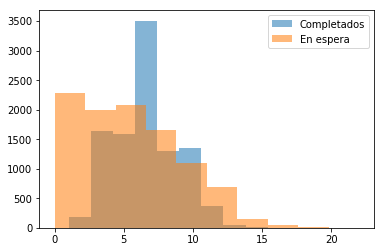

Media clientes completados: 6.5107
Media clientes en espera: 5.494


In [35]:
def ambiente2():
    media = {4:30,3:45}
    media_llegada = 25
    horas_abierto = 5
    N1 = 10000
    ss=simulacion(horas_abierto*60,lambda: tiempo_expon(media[3]),lambda: tiempo_expon(media_llegada))
#     ss.sim2()
    x,y=zip(*[ss.sim2()for i in range(N1)])
    plt.hist(x,alpha=.55, label = 'Completados')
    plt.hist(y,alpha=.55, label= 'En espera')
    plt.legend()
    plt.show()
    print('Media clientes completados:',n.mean(x))
    print('Media clientes en espera:',n.mean(y))
ambiente2()

c). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 4 ejecutivos?, ¿Cuántos quedarán en cola?

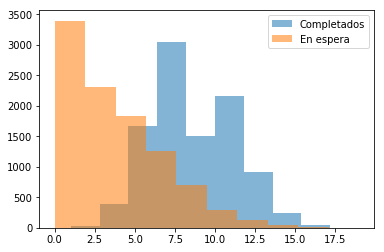

Media clientes Completados: 8.5373
Media clientes en espera: 3.4827


In [34]:
def ambiente2():
    media = {4:30,3:45}
    media_llegada = 25
    horas_abierto = 5
    N1 = 10000
    ss=simulacion(horas_abierto*60,lambda: tiempo_expon(media[4]),lambda: tiempo_expon(media_llegada))
#     ss.sim2()
    x,y=zip(*[ss.sim2()for i in range(N1)])
    plt.hist(x,alpha=.55, label = 'Completados')
    plt.hist(y,alpha=.55, label= 'En espera')
    plt.legend()
    plt.show()
    print('Media clientes completados:',n.mean(x))
    print('Media clientes en espera:',n.mean(y))
ambiente2()

# 2 
a). Demuestre que la distribución de poisson satisface la siguiente forma recursiva de su probabilidad
$$ p(k+1)={\lambda \over k+1}p(k)$$

Realizar todo el desarrollo matemático en mardown usando ecuaciones latex.



$\forall k:k >0:$


$P(0) = \frac { e^{-\lambda}}{0!},$
$P(1) = \frac {\lambda^1 e^{-\lambda}}{1!} = \frac {\lambda e^{-\lambda}}{(1)0!},$
$P(2) = \frac {\lambda^2 e^{-\lambda}}{2!}= \frac { \lambda \lambda  e^{-\lambda}}{(2)(1)0!},$
$P(3) = \frac {\lambda^3 e^{-\lambda}}{3!}= \frac { \lambda \lambda \lambda  e^{-\lambda}}{(3)(2)(1)0!},$
$P(k) = \frac {\lambda^k e^{-\lambda}}{k!} =\frac{\lambda}{k}P(k-1)$

b). De el resultado demostrado en el inciso a) (usando la ecuación recursiva), gráfique la función de distribución de probabilidad y su función acumulada, para $\lambda = [4,10,30]$, valide sus resultados comparando con el paquete estadístico `scipy.stats`. Posteriormente, genere muestras aletorias que distribuyan poisson con el conjunto de parámetros lambda dados y realice el histograma correspondiente (en gráficas distintas para cada lambda), validando lo obtenido al graficar la función de densidad de probabilidad. **Nota**: Recuerde que la distribución de poisson es una distribución de probabilidad discreta así que el histograma debe ser discreto y no continuo.

In [7]:
def poissonGen(mu):
    '''Generador de función de distribución de probabilidad'''
    k = 0
    prev = n.exp(-mu)   
    while True:        
        yield(prev)    
        k +=1
        prev = mu*prev/k

In [8]:
def poissonRVS(N,mu):   
    '''Generador de variables'''
    rs = n.random.rand(N)
    def compare(x):
        gen = CumPoisson(mu)
        v = 0        
        while (x >= next(gen)):
            v+=1
        return v
    return list(map(lambda x:compare(x),rs))

In [9]:
def CumPoisson(mu):
    '''Generador de función de distribución acumulada'''
    gen = poissonGen(mu)
    current = next(gen)
    while True:
        yield current
        current += next(gen)

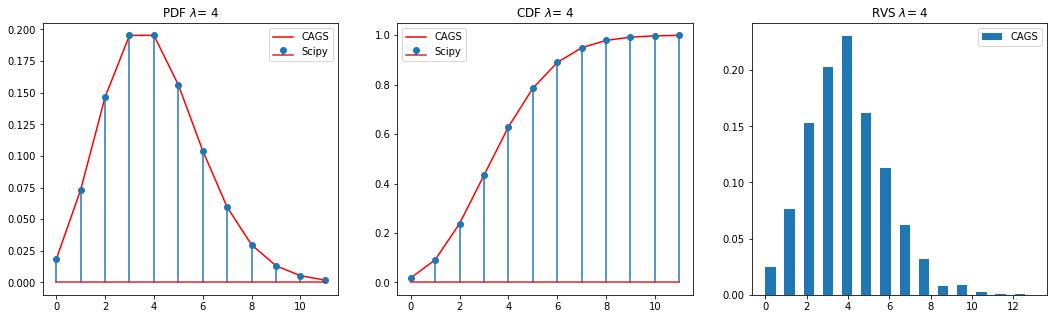

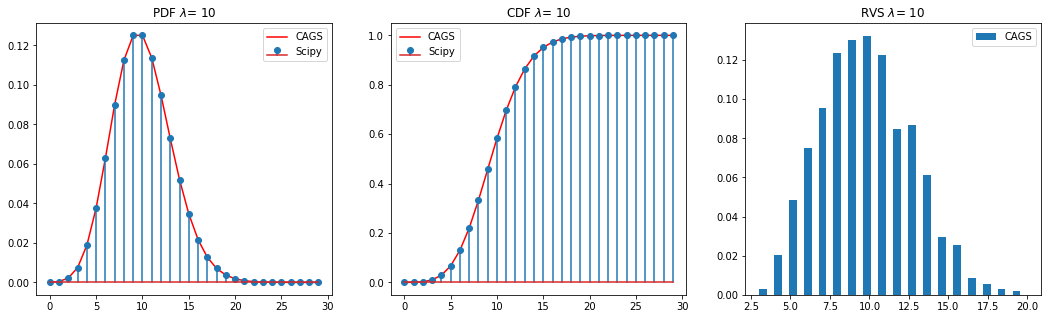

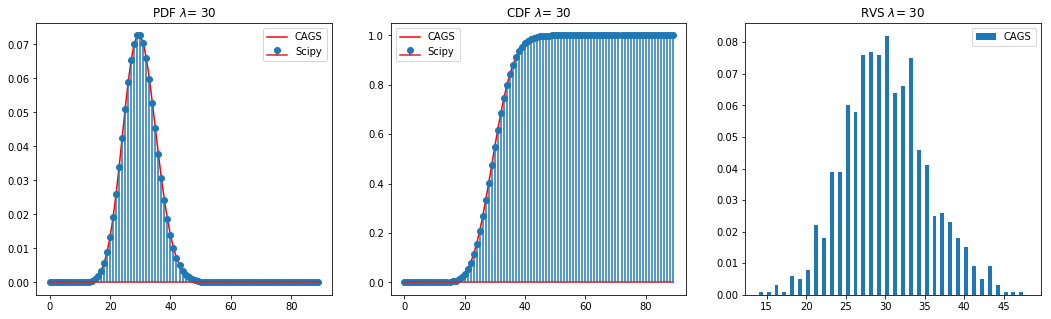

In [38]:
mu = [4,10,30]
for i in mu:    
    plt.figure(figsize=(18,5))
    p = s.poisson(mu=i)
    x = n.arange(3*i)
    y = p.pmf(x)
    a = poissonGen(i)
    plt.subplot(131)
    gen = [next(a) for i in x]
    plt.title('PDF $\lambda$= {}'.format(i))
    plt.plot(x,gen,c='r',label='CAGS')
    plt.stem(y,label='Scipy')
    plt.legend()
    plt.subplot(132)
    plt.title('CDF $\lambda$= {}'.format(i))
    plt.plot(x,n.cumsum(gen),c='r',label='CAGS')
    plt.stem(n.cumsum(y),label='Scipy')    
    plt.legend()
    plt.subplot(133)
    plt.title('RVS $\lambda$= {}'.format(i))
    sample = poissonRVS(1000,i)    
    plt.hist(sample,label='CAGS',width=.5,density=True,bins=len(n.unique(sample)))
    plt.legend()
    plt.show()

# 3
Demostrar **Teoricamente** usando el método de máxima verosimilitud, que los estimadores para los parámetros $\mu$ y $\sigma$ de una distribución normal, estan dados por:

$$\hat \mu = {1\over n}\sum_{i=1}^n x_i,\quad \hat  \sigma^2={1\over n}\sum_{i=1}^n (x_i-\hat \mu)^2$$

**Recuerde que:** La distribución normal es
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Reporte su respuesta usando markdown-latex

$$ l(x)= \prod_i^n f(x_i\mid \mu ,\sigma ^{2})$$

Es conveniente trabajar con $\log l(x)=\log(l(x))$

$l(x)= (2\pi \sigma^2)^{-n/2}e^{-\frac{\sum_i^n(x_i-\mu)^2}{2\sigma^2}} \rightarrow log(l(x)) = \frac{-n}{2}ln(2\pi \sigma^2)-\frac{\sum_i^n (x_i-\mu)^2}{2\sigma^2}$

$\frac{\partial l}{\partial \mu} = -2\frac{-\sum x_i + \mu n}{2\sigma ^2} \rightarrow 0$ , despejamos $\mu$

$\sum x_i = \mu n \rightarrow \mu = \frac{\sum_{i=0}^n x_i}{n}$

$\frac{\partial l}{\partial \sigma} = \frac 1 2 [-n \frac{4\pi\sigma}{2\pi\sigma^2}+2\sigma^{-3}\sum(x_i-\mu)^2] \rightarrow 0$ , despejamos $\sigma^2$

$\frac{n}{\sigma}=\sum(x_i-\mu)^2\sigma^{-3} \rightarrow \sigma^2 = \frac{\sum(x_i-\mu)^2}{n}$

$\mu = \frac{\sum_{i=0}^n x_i}{n},\sigma^2 = \frac{\sum(x_i-\mu)^2}{n}$

# 4
Un banco, de acuerdo a la ley, tienen la posibilidad de poder invertir las utilidades logradas por créditos de trabajo quirografarios en dos diferentes instrumentos de inversión: El primero es inversión en deuda que presenta una utilidad promedio del 23.5% con una desviación estándar de 1.1%. El segundo es inversión a plazo donde la rentabilidad esperada se comporta como una distribución uniforme y está entre el -2% y el 9%, pero nunca entre -0.5% y 0.5%. Calcular cuál es la mejor combinación posible, si la inversión será en múltiplos de 25%, es decir (inv1 25%, Inv2 75%)-(Inv1 50%,Inv2 50%)-(Inv1 75%, Inv2 25%), simular 1000 veces (escenarios) e indicar rendimientos promedio por combinación.

a1 : $N(.23,.011^2)$, a2:$U$

Combinaciónes, función de ponderaciones lineales, cantidad de muestras y muestro de activo normal:

In [11]:
c = [(0,1),(.25,.75),(.5,.5),(.75,.25),(1,0)]
r = lambda x,y,w: x*w[0] + y*w[1]
smple = 1000
a1 = n.random.normal(.235,.011,smple)

Función de probabilidad acumulada para activo con intervalo constante

In [12]:
def F(x):
    a,b,c,d = (-.02,-.005,.005,.09)
    if(a <= x and x <= b):
        return (x-a)/(d-c+b-a)
    elif(b < x and x < c):
        return (b-a)/(d-c+b-a)        
    elif(c <= x and x <= d):
        return (x-c+b-a)/(d-c+b-a)

Estructura de la función de probabilidad acumulada.

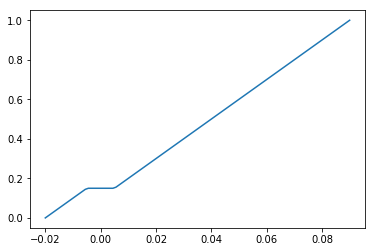

In [13]:
def aux(): 
    '''Ambiente autocontenido'''
    a,b,c,d = (-.02,-.005,.005,.09)
    x=n.linspace(a,d,100)
    plt.plot(x,[F(i) for i in x])
    plt.show()
aux()

Función Inversa

In [14]:
def F_1(x):
    a,b,c,d = (-.02,-.005,.005,.09)
    den = (d-c+b-a)
    if(0 <= x and x <= (b-a)/den):
        return x*den+a
    elif((b-a)/den < x and x <= 1):
        return x*den+c-b+a

Generamos los aleatorios.

In [15]:
a2=list(map(lambda x:F_1(x),n.random.rand(10000)))

La distribución del activo uniforme se generó correctamente.

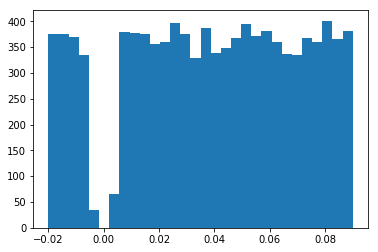

In [16]:
plt.hist(a2,bins=30)
plt.show()

In [17]:
print('La mejor combinación de activos es :',c[n.argmax([r(n.mean(a1),n.mean(a2),i) for i in c])])

La mejor combinación de activos es : (1, 0)


Bastante sencillo el resultado si consideramos que un activo es normal centrado en 23.5% con desviación 1.1% y el otro uniforme sin siquiera alcanzar 10% como cota superior.

# 5
Considere la siguiente función de distribución de probabilidad
$$ f(x)=\begin{cases}400e^{-400(x-1)},& \text{para }x\geq 1\\0,& \text{otro caso}\end{cases}$$

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.

$u= -400(x-1), du=-400dx \rightarrow -\int_0^{-\inf}e^udu$

Centro de masa respecto a $u :\frac{-1}{-\inf-0}e^u\big |_0^{-\inf}=0 \rightarrow e^0 \rightarrow E[x] = 1$

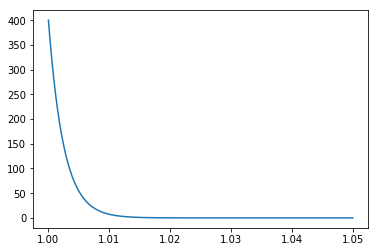

In [18]:
x = n.linspace(1,1.05,1000)
f = lambda x:400*n.exp(-400*(x-1))
plt.plot(x,f(x))
plt.show()

b). Realice el desarrollo teórico para obtener muestras aletorias de esta distribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos.

Con la transformación $u = g(x)$ anterior y el desarrollo de a):
$F(x) = -e^{-400(x-1)}$

In [19]:
F_1 = lambda x: -n.log(x)/400+1
f = lambda x: 400*n.exp(-400*(x-1))
'''Función a ser propuesta'''
f1 = lambda x: 400/x**300

$c = \frac{-400}{299}x^{-299}\big|_1^\inf=\frac{400}{299}$

In [20]:
F1_1 = lambda x: (1/x)**(1./299)
c =400/299

De una vez generamos graficamos una función para usar el método de aceptación y rechazo.

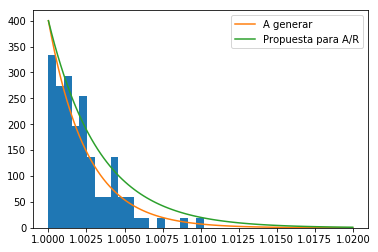

In [21]:
plt.hist(F_1(n.random.rand(100)),bins=20,density=True)
x=n.linspace(1,1.02,100)
plt.plot(x,f(x),label='A generar')
plt.plot(x,f1(x),label='Propuesta para A/R')
plt.legend()
plt.show()

c). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias.

In [22]:
ns = 1000*400//299
u1 = n.random.rand(ns)
Y = F1_1(n.random.rand(ns))
zipped = zip(u1,Y)
aa=list(filter(lambda x: x[0]*f1(x[1])<f(x[1]),zipped))
_,u2=zip(*aa)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


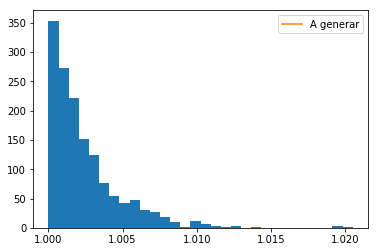

In [39]:
plt.hist(u2,bins=30,density=True)
x=n.linspace(1,1.02,100)
plt.plot(x,f(x),label='A generar')
plt.legend()
plt.show()



**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

d). Use el método de montecarlo crudo para estimar la media.

In [24]:
# F_1(n.random.rand(100))
A = 1
seq = [100,1000,10000,1000000]
res = list(map(lambda x:n.mean(list(map(lambda x:F_1(x),n.random.rand(x)))),seq))

e). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

In [25]:
strat = []
for i in seq:
    a,b,c = (int(.2*i),int(.25*i),int(.15*i))    
    r1 = n.random.uniform(0,.3,a)
    r2 = n.random.uniform(.3,.5,a)
    r3 = n.random.uniform(.5,.7,b)
    r4 = n.random.uniform(.7,.9,c)
    r5 = n.random.uniform(.9,1,a)
    r  = [r1,r2,r3,r4,r5]
    m  = range(len(r))  # Cantidad de estratos
    w  = [.3/a,.2/a,.2/b,.2/c,.1/a]
    estrat1 = list(map(lambda r:n.array(list(map(F_1,r))),r))
    muestras = list(map(lambda wi,xi:xi*wi,w,estrat1))
    strat.append(n.concatenate(muestras).sum()) 

f). Use el método de los números complementarios.

In [26]:
comp=[n.mean([(F_1(u)+F_1(1-u))/2 for u in n.random.rand(i//2)]) for i in seq]

g). Finalmente use el método de estratificación en el cúal se divide en N estratos.

In [27]:
partition = lambda B:(n.random.rand(B)+n.arange(B))/B
Nstrat= [n.mean([F_1(x) for x in partition(i)]) for i in seq]

h). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su **error relativo con el valor obtenido en el inciso a).**

In [28]:
import pandas as pd
df =pd.DataFrame(res,index=seq,columns=['Montecarlo'])
df['Error M'] = df['Montecarlo']/A -1
df['Estratificado'] = strat
df['Error E'] = df['Estratificado']/A -1
df['N Estratificado'] = Nstrat
df['Error NE'] = df['N Estratificado']/A -1
df['Complementarios'] = comp
df['Error C'] = df['Complementarios']/A -1
df['Analítico'] = A
df

,Montecarlo,Error M,Estratificado,Error E,N Estratificado,Error NE,Complementarios,Error C,Analítico
100,1.002528,0.002528,1.002279,0.002279,1.002484,0.002484,1.002480,0.002480,1
1000,1.002442,0.002442,1.002542,0.002542,1.002497,0.002497,1.002456,0.002456,1
10000,1.002490,0.002490,1.002490,0.002490,1.002500,0.002500,1.002527,0.002527,1
1000000,1.002501,0.002501,1.002501,0.002501,1.002500,0.002500,1.002498,0.002498,1


# 6
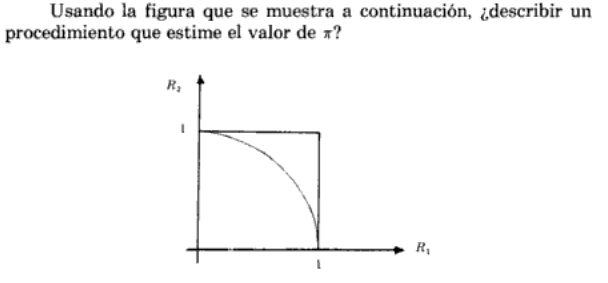

## <font color = 'red'> Nota: </font> Use el método de integración montecarlo visto en clase.
    
a). Use el método de montecarlo para aproximar el valor de pi para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *6*, para constrastar los resultados . Explique sus resultados.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/80a984ae034987174d331e67cecc1fbebe71cc27"></img>

$v = \int_0^1dx = 1$

In [29]:
A = n.pi/4
f = lambda x:n.sqrt(1-x**2)
seq = [100,1000,10000,1000000]
res = list(map(lambda x:n.mean(list(map(lambda x:f(x),n.random.rand(x)))),seq))

Use el método de muestreo estratificado con 5 estratos  $0≤𝐹(𝑥)≤0.3,0.3≤𝐹(𝑥)≤0.5,0.5≤𝐹(𝑥)≤0.7,0.7≤𝐹(𝑥)≤0.9  y  0.9≤𝐹(𝑥)≤1$ . Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

In [30]:
strat = []
for i in seq:
    a,b,c = (int(.2*i),int(.25*i),int(.15*i))    
    r1 = n.random.uniform(0,.3,a)
    r2 = n.random.uniform(.3,.5,a)
    r3 = n.random.uniform(.5,.7,b)
    r4 = n.random.uniform(.7,.9,c)
    r5 = n.random.uniform(.9,1,a)
    r  = [r1,r2,r3,r4,r5]
    m  = range(len(r))  # Cantidad de estratos
    w  = [.3/a,.2/a,.2/b,.2/c,.1/a]
    estrat1 = list(map(lambda r:n.array(list(map(f,r))),r))
    muestras = list(map(lambda wi,xi:xi*wi,w,estrat1))
    strat.append(n.concatenate(muestras).sum())    

Use el método de los números complementarios.

In [31]:
comp=[n.mean([(f(u)+f(1-u))/2 for u in n.random.rand(i//2)]) for i in seq]

Finalmente use el método de estratificación en el cúal se divide en N estratos.

In [32]:
partition = lambda B:(n.random.rand(B)+n.arange(B))/B
Nstrat= [n.mean([f(x) for x in partition(i)]) for i in seq]

In [33]:
import pandas as pd
df =pd.DataFrame(res,index=seq,columns=['Montecarlo'])
df['Error M'] = df['Montecarlo']/A -1
df['Estratificado'] = strat
df['Error E'] = df['Estratificado']/A -1
df['N Estratificado'] = Nstrat
df['Error NE'] = df['N Estratificado']/A -1
df['Complementarios'] = comp
df['Error C'] = df['Complementarios']/A -1
df['Analítico'] = A
df

,Montecarlo,Error M,Estratificado,Error E,N Estratificado,Error NE,Complementarios,Error C,Analítico
100,0.780419,-0.006340,0.793590,0.010430,0.786001,7.669798e-04,0.790610,0.006635,0.785398
1000,0.793169,0.009894,0.786658,0.001604,0.785410,1.519760e-05,0.784387,-0.001287,0.785398
10000,0.783141,-0.002873,0.784945,-0.000577,0.785398,3.195917e-07,0.786134,0.000937,0.785398
1000000,0.785292,-0.000136,0.785384,-0.000018,0.785398,-2.480069e-10,0.785254,-0.000184,0.785398


**Valor de los ejercicios**
- 1- 2 puntos
- 2- 2 puntos
- 3- 1 punto
- 4- 1 punto
- 5- 3 puntos
- 6- 1 punto

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>